In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [54]:
bollywood_df = pd.read_csv('bollywood.csv', encoding="ISO-8859-1")

### 1.How many records are present in the dataset? Print the metadata information of the dataset.

In [55]:
len(bollywood_df.index) #there is 149 data recorded in df

149

In [56]:
bollywood_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   S No                             149 non-null    int64  
 1   Release Date                     149 non-null    object 
 2   Movie Name                       149 non-null    object 
 3   Release Date (N / LW / Festive)  149 non-null    object 
 4   Genre-Defined                    149 non-null    object 
 5   Budget                           149 non-null    int64  
 6   Box Office Collection            149 non-null    float64
 7   Youtube Views                    149 non-null    int64  
 8   Youtube Likes                    149 non-null    int64  
 9   Youtube Dislikes                 149 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 11.8+ KB


### 2. How many movies got released in each genre?Which genre had highest number of releases?Sort number of releases in each genre in descending order.

In [58]:
#count the number of movies released based on genre and sort in descending order
bollywood_df['Genre-Defined'].value_counts()
#There is duplicate variable in the movie genre due to misspelling.
#Duplicate variable is resolved by removing the 'space' in data frame.

# The most popular movie genre is Comedy (36 movies), followed by drama, thriller, romance, and action.

Comedy      36
Drama       35
Thriller    29
Romance     25
Action      24
Name: Genre-Defined, dtype: int64

### 3. How many movies in each genre got released in different release times like long weekend, festive season, etc. 

In [62]:
#Release time of movie genre based on their genre can be seen through cross-tabulation

pd.crosstab(bollywood_df['Release Date (N / LW / Festive)'], bollywood_df['Genre-Defined'])

Genre-Defined,Action,Comedy,Drama,Romance,Thriller
Release Date (N / LW / Festive),,,,,
FS,3,3,4,3,4
HS,3,5,6,3,1
LW,3,5,1,4,2
N,15,23,24,15,22


### 4.	Which month of the year, maximum number movie releases are seen? (Note: Extract a new column called month from ReleaseDate column.)

In [72]:
#Extract a new column called 'month' from 'Release Date' column
bollywood_df['month'] = pd.DatetimeIndex(bollywood_df['Release Date']).month

#count the number of film released by month
bollywood_df['month'].value_counts()

# The maximum number of movie released is in January (20 movies)

1     20
3     19
5     18
7     16
2     16
4     11
9     10
6     10
11    10
10     9
8      8
12     2
Name: month, dtype: int64

### 5.	Which month of the year typically sees most releases of high budgeted movies, that is, movies with budget of 22.5 crore or more?

In [77]:
# assume that budgets are all in crore unit.

#filter the movie with budget >= 22.5 crore and create data frame named 'high_budget'
high_budget = bollywood_df[bollywood_df['Budget'] >= 22.5]

#Do the value count of 'month' in 'high_budget' to know in which month high-budgeted movies are typically released
high_budget['month'].value_counts()

# High-budgeted movies are typically released in February

2     10
1      8
3      7
8      7
4      6
9      6
6      6
11     6
7      6
10     5
5      3
12     2
Name: month, dtype: int64

### 6.	Which are the top 5 movies with maximum return on investment (ROI)? Calculate return on investment (ROI) as (BoxOfficeCollection – Budget) / Budget.

In [82]:
#in this case, feature engineering is used by creating a new column named 'ROI'
#ROI = (BoxOfficeCollection - Budget)/Budget

#Create a new column
bollywood_df['ROI'] = (bollywood_df['Box Office Collection'] - bollywood_df['Budget'])/bollywood_df['Budget']

#Sort ROI in descending order and display the top 5 rows
bollywood_df.sort_values('ROI', ascending=False).head()

,S No,Release Date,Movie Name,Release Date (N / LW / Festive),Genre-Defined,Budget,Box Office Collection,Youtube Views,Youtube Likes,Youtube Dislikes,month,ROI
64,65,26-Apr-13,Aashiqui 2,N,Romance,12,110.0,2926673,4944,628,4,8.166667
89,90,19-Dec-14,PK,HS,Drama,85,735.0,13270623,43767,5693,12,7.647059
132,133,13-Sep-13,Grand Masti,LW,Comedy,35,298.0,1795640,3015,721,9,7.514286
135,136,20-Sep-13,The Lunchbox,N,Drama,10,85.0,1064854,4054,285,9,7.500000
87,88,14-Jun-13,Fukrey,N,Comedy,5,36.2,227912,222,39,6,6.240000


### 7.	Do the movies have higher ROI if they get released on festive seasons or long weekend? Calculate the average ROI for different release times.

In [86]:
#Group the average ROI by Release Date
bollywood_df.groupby('Release Date (N / LW / Festive)')[['ROI']].mean()

#This result proves that movies released on (LW) and (FS)has higher average ROI than (N)

,ROI
Release Date (N / LW / Festive),
FS,0.973853
HS,0.850867
LW,1.127205
N,0.657722


### 8.	Draw a histogram and a distribution plot to find out the distribution of movie budgets. Interpret the plot to conclude if the most movies are high or low budgeted movies.

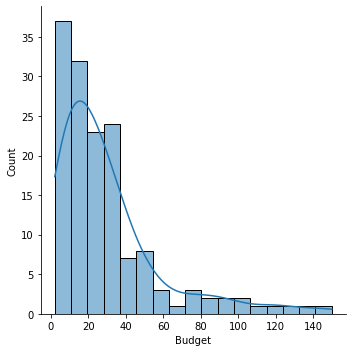

In [110]:
sn.displot(bollywood_df['Budget'], kde = True)

# This distribution plot shows a positively skewed graph
# The budget needed for the movies are mostly below 40 crore

### 9.	Compare the distribution of ROIs between movies with comedy genre and drama. Which genre typically sees higher ROIs?

<AxesSubplot:xlabel='Genre-Defined', ylabel='ROI'>

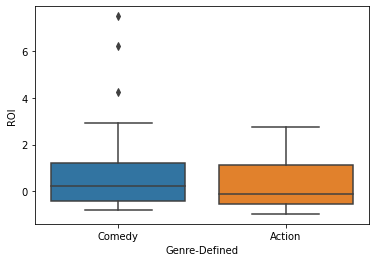

In [175]:
#Distribution can be compared using KDE, boxplot graph,and stacked distribution plot

#using boxplot
genre_df = bollywood_df[(bollywood_df['Genre-Defined'] == 'Comedy') | (bollywood_df['Genre-Defined'] == 'Action')]
sn.boxplot(x = 'Genre-Defined', y = 'ROI', data = genre_df)

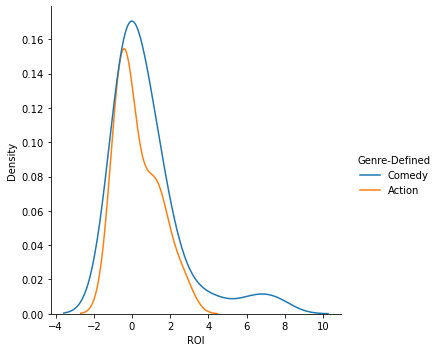

In [185]:
#Using Kernel Distribution Estimation (KDE)

sn.displot(data=genre_df, x="ROI", hue="Genre-Defined", kind="kde")

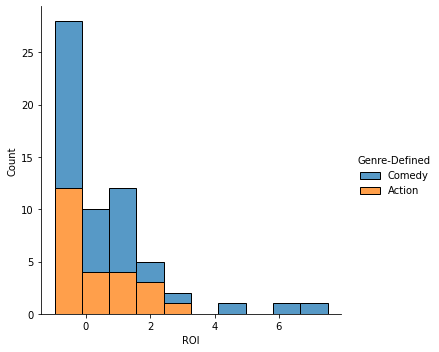

In [188]:
#using stacked distribution plot
sn.displot(data=genre_df, x="ROI", hue="Genre-Defined", multiple="stack")

In [ ]:
#These graphs shows that Comedy movies give higher ROI than Action movies

### 10.	Is there a correlation between box office collection and YouTube likes? Is the correlation positive or negative?

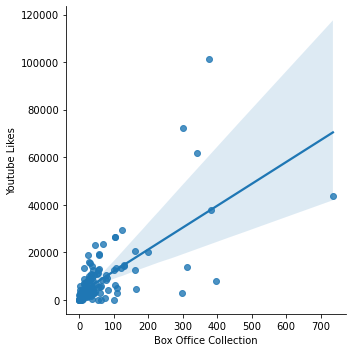

In [127]:
sn.lmplot(x='Box Office Collection', y = 'Youtube Likes', data = bollywood_df)

# There is low positive correlation (nearly no correlation) between box office collection and Youtube likes

### 11.	Which genre of movies typically sees more YouTube likes? Draw boxplots for each genre of movies to compare.

<AxesSubplot:xlabel='Genre-Defined', ylabel='Youtube Likes'>

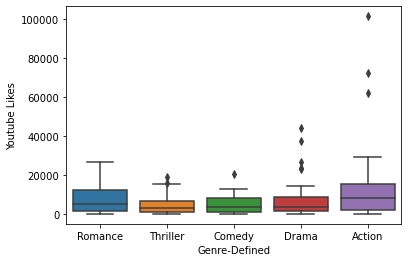

In [128]:
#Create multiple boxplots based on their genre
sn.boxplot(x = 'Genre-Defined', y = 'Youtube Likes', data = bollywood_df)

#Based on this graph, Action movies typically have more YouTube likes (based on the average YouTube likes)
#Number of YouTube likes for Comedy movies are more consistent among movie genres,
#while number of YouTube likes for Romance and Action movies are the more varieable.

### 12.	Which of the variables among Budget, BoxOfficeCollection, YoutubeView, YoutubeLikes, YoutubeDislikes are highly correlated? Note: Draw pair plot or heatmap.

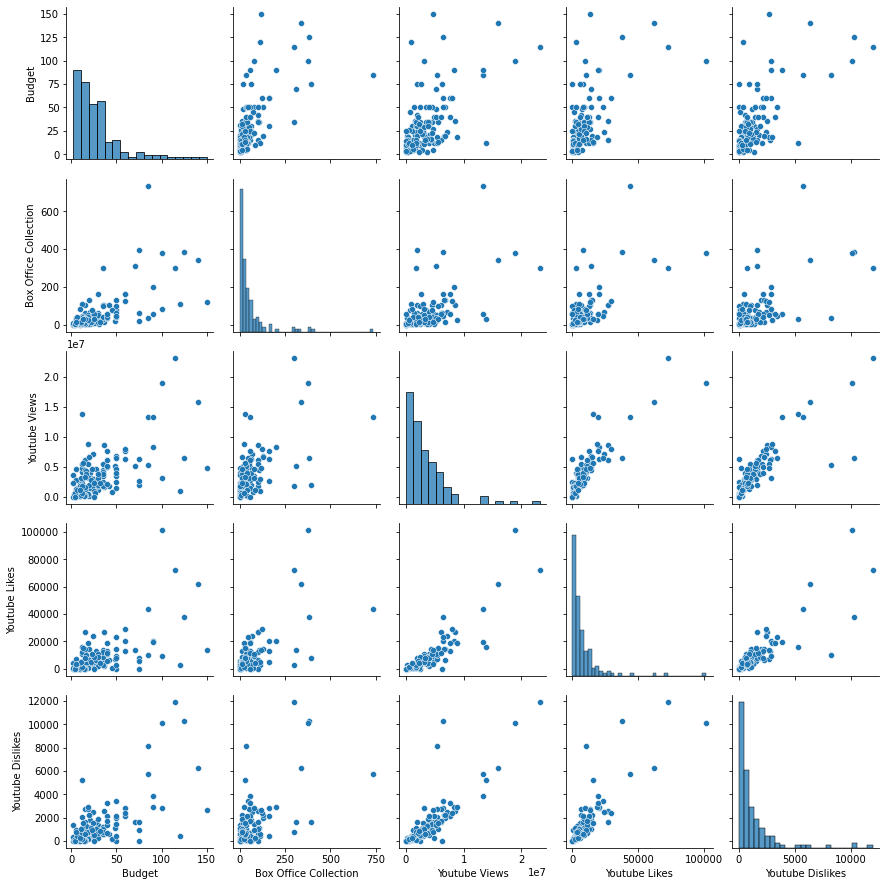

In [131]:
#create the list of variable that you want to compare
var = ['Budget', 'Box Office Collection', 'Youtube Views', 'Youtube Likes', 'Youtube Dislikes']

#Create a pair plot
sn.pairplot(bollywood_df[var])

<AxesSubplot:>

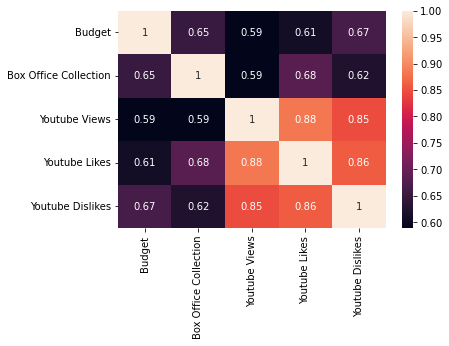

In [133]:
#Create a heatmap
sn.heatmap(bollywood_df[var].corr(), annot=True)

#Based on the graphs and correlation coefficient, it is shown that Youtube likes and views are highly correlated